# Домашнее задание №2

In [123]:
import pydotplus 
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Image
from sklearn import tree
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import urllib.request

## Задание 2 (Применение решающего дерева)

### Построим решающее дерево и визуализируем его

In [103]:
url="https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/german_credit.csv"
data = urllib.request.urlopen(url)
german = pd.read_csv(data)

In [104]:
german['target']=german['Creditability']
del german['Creditability']

In [106]:
german.head()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,target
0,1,18,4,2,1049,1,2,4,1,4,2,21,3,1,1,3,1,1,1,1
1,1,9,4,0,2799,1,3,2,1,2,1,36,3,1,2,3,2,1,1,1
2,2,12,2,9,841,2,4,2,1,4,1,23,3,1,1,2,1,1,1,1
3,1,12,4,0,2122,1,3,3,1,2,1,39,3,1,2,2,2,1,2,1
4,1,12,4,0,2171,1,3,4,1,4,2,38,1,2,2,2,1,1,2,1


In [107]:
model = tree.DecisionTreeClassifier()
model.fit(german.iloc[:, :-1], german.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [108]:
dot_data = tree.export_graphviz(model, out_file="big_tree.out", 
                         feature_names=german.columns,  
                         class_names=['yes','no'],  
                         filled=True, rounded=True,  
                         special_characters=True)

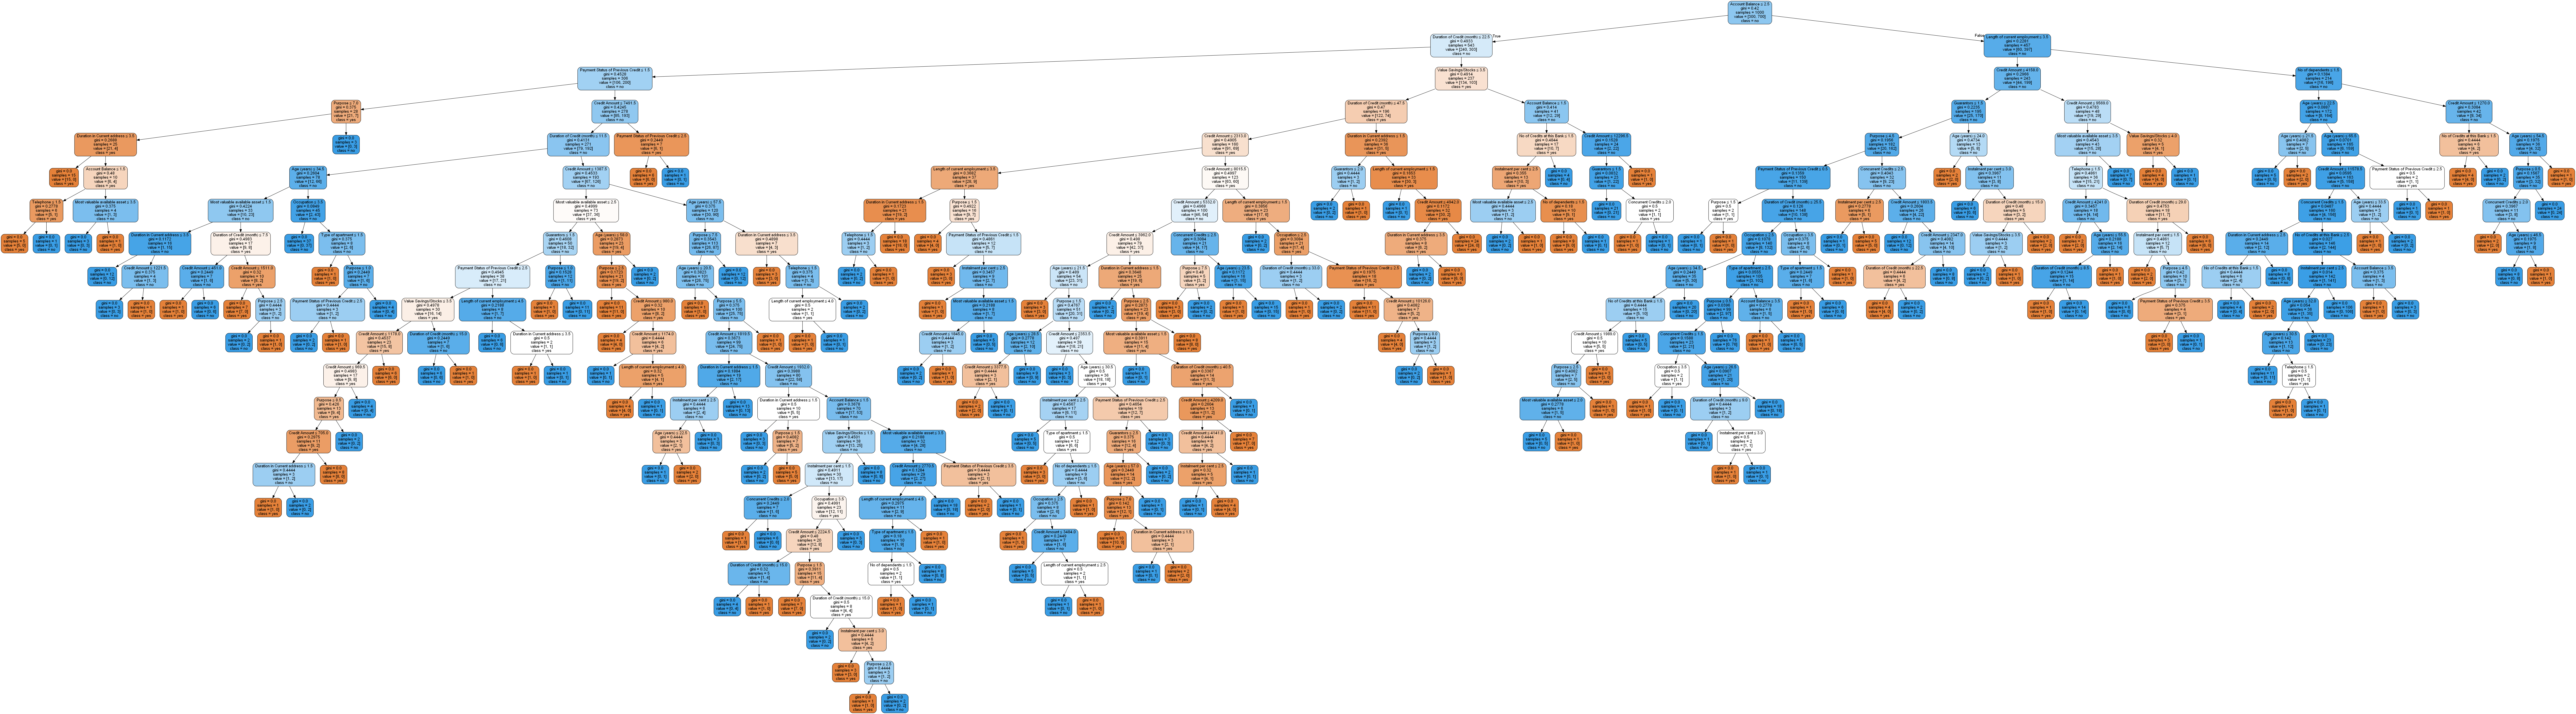

In [109]:
graph = pydotplus.graphviz.graph_from_dot_file("big_tree.out")  
Image(graph.create_png())

Ограничим по глубине

In [113]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(german.iloc[:, :-1], german.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [116]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                         feature_names=german.columns,  
                         class_names=['no','yes'],  
                         filled=True, rounded=True,  
                         special_characters=True)

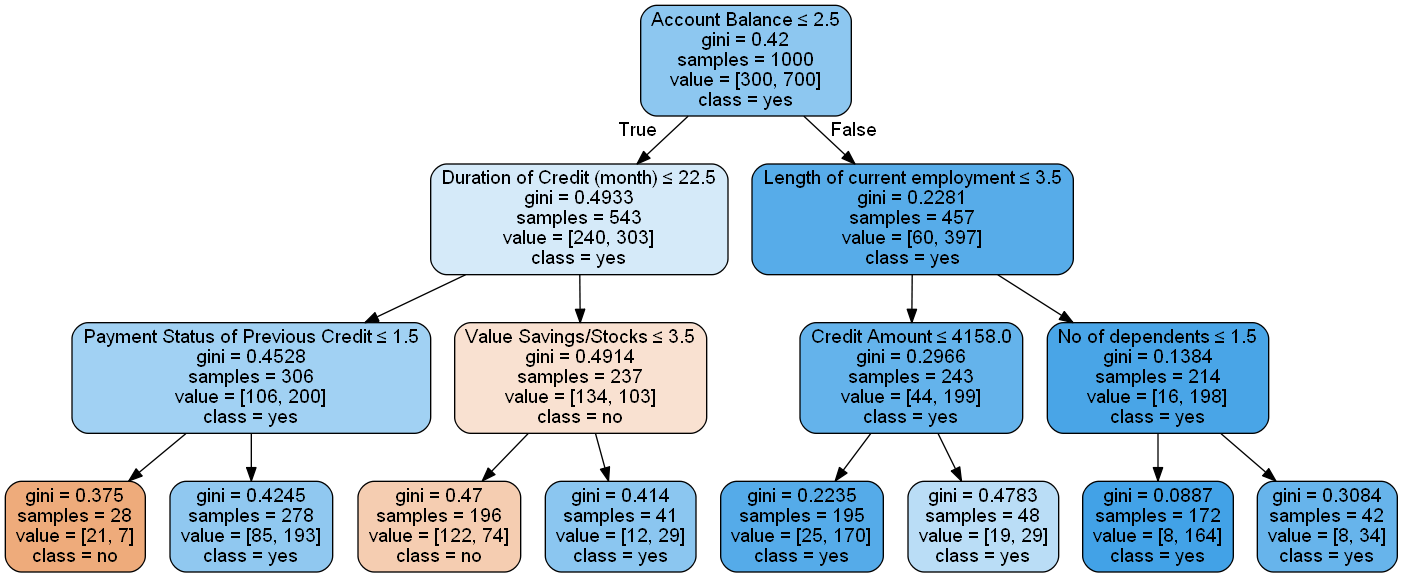

In [117]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())

Видим, что получают кредит люди с большим счетом. Иначе смотрят на длительность кредита:
    1) если большой срок, то кредит дают у кого больште сбережения
    2) если краткосрочный - у кого много уже выплаченных ранее кредитов

###  Построим графики зависимости качества на кросс-валидации и на обучающей выборке от глубины дерева

In [131]:
accuracy = []
for depth in range(1, 100):
    model = tree.DecisionTreeClassifier(max_depth=depth)
    accuracy.append(np.mean(cross_val_score(model,german.iloc[:, :-1], german.target, cv=10)))

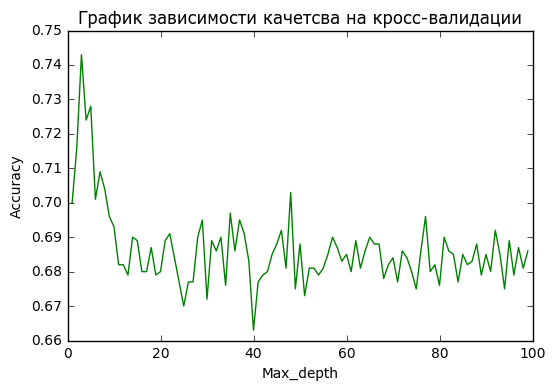

In [132]:
grid=range(1,100)
plt.plot(grid, accuracy, color='green')
plt.xlabel(u'Max_depth',family='verdana' )
plt.ylabel('Accuracy')
plt.title(u'График зависимости качетсва на кросс-валидации', family='verdana')
plt.show()

In [128]:
train_data, test_data, train_target, test_target = train_test_split(german.iloc[:, :-1], 
                                                                    german.target,
                                                                    test_size = 0.3,
                                                                    random_state = 1)

In [129]:
accuracy = []
for depth in range(1, 100):
    model = tree.DecisionTreeClassifier(max_depth=depth)
    model.fit(train_data, train_target)
    accuracy.append(accuracy_score(test_target, model.predict(test_data)))

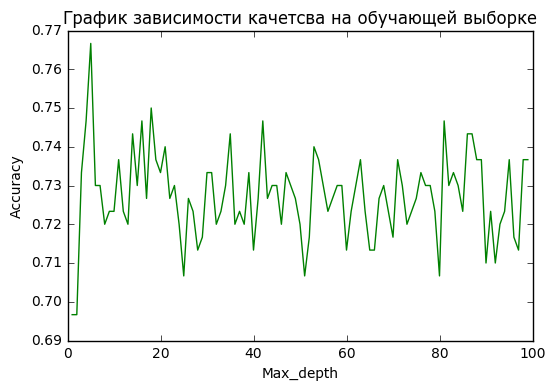

In [130]:
grid=range(1,100)
plt.plot(grid, accuracy, color='green')
plt.xlabel(u'Max_depth',family='verdana' )
plt.ylabel('Accuracy')
plt.title(u'График зависимости качетсва на обучающей выборке', family='verdana')
plt.show()